In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import FeatureAgglomeration
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import  MinMaxScaler
from sklearn.mixture import GaussianMixture


      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
3307            9.4              0.24         0.29  ...       0.38     11.0        3
445             7.1              0.32         0.32  ...       0.40     11.5        3
2050           11.8              0.23         0.38  ...       0.55      9.7        3
3810            6.8              0.26         0.34  ...       0.52     10.5        3
3409            6.2              0.23         0.35  ...       0.43     11.0        3
...             ...               ...          ...  ...        ...      ...      ...
774             9.1              0.27         0.45  ...       0.46     10.4        9
827             7.4              0.24         0.36  ...       0.48     12.5        9
876             6.9              0.36         0.34  ...       0.36     12.7        9
820             6.6              0.36         0.29  ...       0.61     12.4        9
1605            7.1              0.26         0.49  ...       0.4

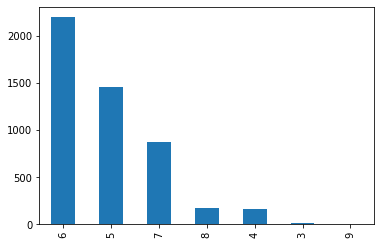

In [174]:
data = pd.read_csv("winequality-white.csv",sep=";")

data = data.sort_values(by='quality',axis=0)
print(data)
print(data['quality'].value_counts())
data['quality'].value_counts().plot(kind='bar')

y = data.iloc[:,11].to_numpy()


x = data.iloc[:,:11].to_numpy()
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=7/10, random_state=42)
scaler = MinMaxScaler()
scaler1=StandardScaler()
x = scaler1.fit_transform(x)
datatest = scaler.fit_transform(data)
nndata = scaler.fit_transform(data.iloc[:,:11].to_numpy())

#y_train = np.where(y_train>=7,1,0)
#y_test = np.where(y_test>=7,1,0)

In [161]:
print(datatest)
print(x)

[[0.53846154 0.15686275 0.1746988  ... 0.18604651 0.48387097 0.        ]
 [0.31730769 0.23529412 0.19277108 ... 0.20930233 0.56451613 0.        ]
 [0.76923077 0.14705882 0.22891566 ... 0.38372093 0.27419355 0.        ]
 ...
 [0.29807692 0.2745098  0.20481928 ... 0.1627907  0.75806452 1.        ]
 [0.26923077 0.2745098  0.1746988  ... 0.45348837 0.70967742 1.        ]
 [0.31730769 0.17647059 0.29518072 ... 0.23255814 0.79032258 1.        ]]
[[ 3.01643326 -0.37943543 -0.36519658 ... -1.90923792 -0.96260494
   0.394746  ]
 [ 0.29061097  0.41433932 -0.11727796 ...  0.34263866 -0.78734189
   0.80108656]
 [ 5.86076957 -0.47865728  0.37855928 ... -1.71054293  0.527131
  -0.66173945]
 ...
 [ 0.05358295  0.8112267   0.04800112 ...  0.60756531 -1.13786799
   1.7763039 ]
 [-0.30195909  0.8112267  -0.36519658 ...  1.46857694  1.05292016
   1.53249956]
 [ 0.29061097 -0.18099175  1.28759423 ...  1.20365029 -0.61207884
   1.93884012]]


K-means
For validation, tried checking the number of "classes" that were assigned to actual labels, does not seem to be any successful performance on any individual level.

In [114]:
def kmeans(data, ret = False):
  if ret:
    km = KMeans(n_clusters=7, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
  
    y_km = km.fit_predict(data)
  
    print(y_km)
    
    return y_km
  distortions = []
  for i in range(10, 200, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=50, max_iter=400,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    
    
    
    distortions.append(km.inertia_)

# plot
  plt.plot(range(10,200,10), distortions, marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Distortion')
  plt.show()
  print(y_km)
  

[0 2 4 ... 2 5 2]


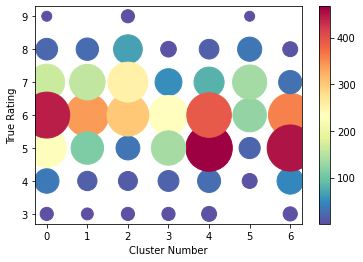

In [108]:
colorweightedScatter(kmeans(x,ret=True),y)

Expectation Maximization


In [96]:
def expMax(data,comps):
  gauss = GaussianMixture(n_components=comps,random_state=0)
  
  y_gauss = gauss.fit_predict(data)
  print(gauss.n_iter_)
  return(y_gauss)

In [86]:
#from: https://stackoverflow.com/questions/32687826/how-can-i-account-for-identical-data-points-in-a-scatter-plot/32691209
def colorweightedScatter(xvals,y):
  
  points=list(set(zip(xvals,y))) 
  #Generate a list of point counts
  count=[len([x for x,y in zip(xvals,y) if x==p[0] and y==p[1]]) for p in points]
  #Now for the plotting:
  plot_x=[i[0] for i in points]
  plot_y=[i[1] for i in points]
  count=np.array(count)
  plt.scatter(plot_x,plot_y,c=count,s=100*count**0.5,cmap='Spectral_r')
  plt.colorbar()
  plt.ylabel("True Rating")
  plt.xlabel("Cluster Number")
  plt.show()

2


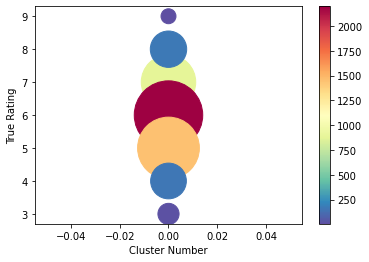

19


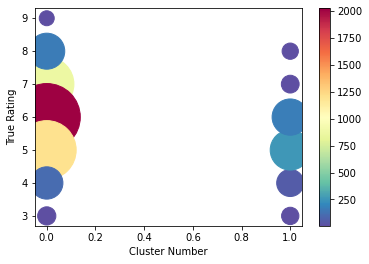

20


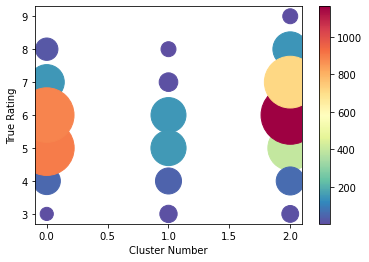

50


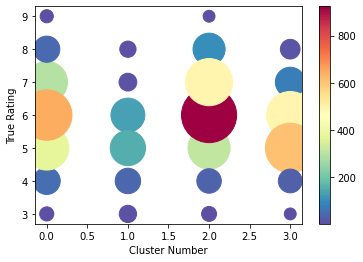

49


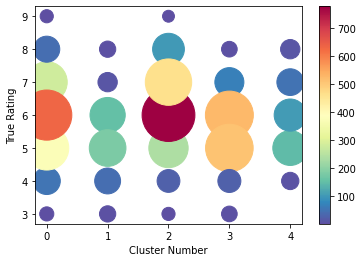

53


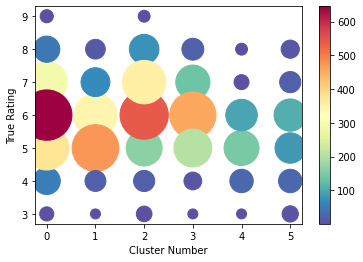

41


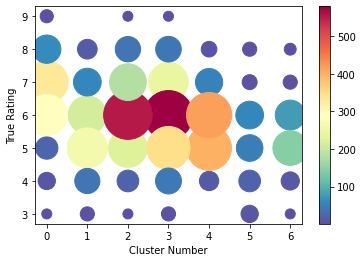

41


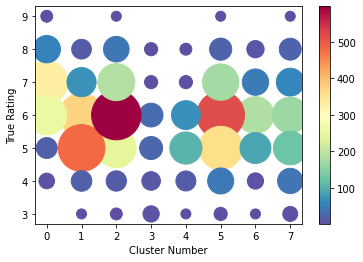

40


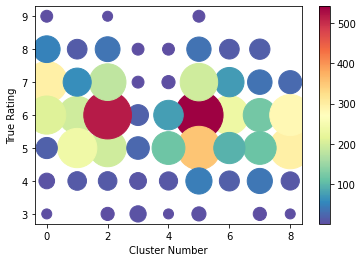

In [109]:
for i in range(1,10):
  colorweightedScatter(expMax(x,i),y)

PCA
PCA attempts to project multiple dimensions into lower dimension space. The explained variance ratio gives the percentage representation of the resulting dimensions.

In [101]:
def pc_a(data,comps):
  num = comps
  pca = PCA(n_components=num)
 
  # fit and transform data
  X_train_pca = pca.fit_transform(data)
  print(pca.explained_variance_ratio_)
  
  data = pd.DataFrame(X_train_pca)
  return data
  

In [110]:

for i in range (3,9):
  kmeans(pc_a(x,i),ret=True)

[0.38165992 0.17846312 0.12895247]
[0 5 6 ... 5 2 5]
[0.38165992 0.17846312 0.12895247 0.08592807]
[1 4 6 ... 4 5 4]
[0.38165992 0.17846312 0.12895247 0.08592807 0.06842803]
[0 2 4 ... 2 5 2]
[0.38165992 0.17846312 0.12895247 0.08592807 0.06842803 0.04595895]
[0 2 4 ... 2 5 2]
[0.38165992 0.17846312 0.12895247 0.08592807 0.06842803 0.04595895
 0.03924179]
[0 2 4 ... 2 5 2]
[0.38165992 0.17846312 0.12895247 0.08592807 0.06842803 0.04595895
 0.03924179 0.0332141 ]
[0 2 4 ... 2 5 2]


In [ ]:
colorweightedScatter(kmeans(pc_a(datatest,7),ret=True),y)

[0.36413061 0.15316981 0.12291243 0.10565624 0.07116795 0.05219608
 0.03796824]
40


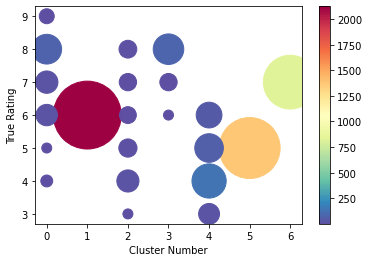

In [149]:
colorweightedScatter(expMax(pc_a(datatest,7),7),y)

[0.36413061 0.15316981 0.12291243 0.10565624 0.07116795]
[5 5 5 ... 2 2 2]


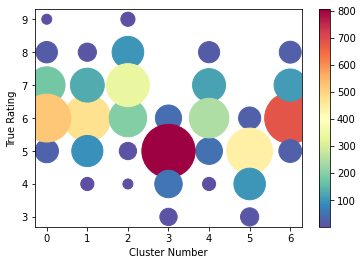

In [125]:
colorweightedScatter(kmeans(pc_a(datatest,5),ret=True),y)

ICA

In [141]:
def ica(data):
  ica = FastICA(n_components=8,random_state=0)
  S_ = ica.fit_transform(data)
  new = pd.DataFrame(S_)
  print(new)
  print(new.kurtosis(axis=0).mean())
  return new

             0         1         2  ...         5         6         7
0    -0.044048 -0.049573 -0.007648  ...  0.006153 -0.047643  0.010144
1     0.013103 -0.015224 -0.000107  ...  0.010498 -0.045761  0.035954
2    -0.021023 -0.008951  0.007593  ... -0.001406 -0.027111  0.029759
3    -0.007214 -0.011807 -0.004366  ...  0.000432 -0.047948  0.029408
4     0.007859 -0.004846 -0.016446  ...  0.010836 -0.056912  0.003026
...        ...       ...       ...  ...       ...       ...       ...
4893 -0.016744  0.028732  0.020625  ...  0.014139  0.056862  0.003673
4894 -0.018795  0.014928  0.009117  ...  0.002544  0.034210 -0.007635
4895 -0.011568  0.005038  0.019182  ...  0.014667  0.036193 -0.002113
4896  0.006500  0.029367  0.020201  ... -0.011335  0.034253 -0.001126
4897 -0.020012  0.020641  0.012694  ...  0.014217  0.030681 -0.006354

[4898 rows x 8 columns]
2.5655235590468077
[6 4 4 ... 5 5 5]


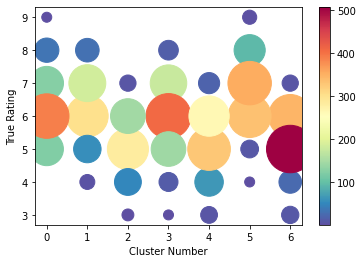

In [142]:
colorweightedScatter(kmeans(ica(datatest),ret=True),y)

             0         1         2  ...         5         6         7
0    -0.044048 -0.049573 -0.007648  ...  0.006153 -0.047643  0.010144
1     0.013103 -0.015224 -0.000107  ...  0.010498 -0.045761  0.035954
2    -0.021023 -0.008951  0.007593  ... -0.001406 -0.027111  0.029759
3    -0.007214 -0.011807 -0.004366  ...  0.000432 -0.047948  0.029408
4     0.007859 -0.004846 -0.016446  ...  0.010836 -0.056912  0.003026
...        ...       ...       ...  ...       ...       ...       ...
4893 -0.016744  0.028732  0.020625  ...  0.014139  0.056862  0.003673
4894 -0.018795  0.014928  0.009117  ...  0.002544  0.034210 -0.007635
4895 -0.011568  0.005038  0.019182  ...  0.014667  0.036193 -0.002113
4896  0.006500  0.029367  0.020201  ... -0.011335  0.034253 -0.001126
4897 -0.020012  0.020641  0.012694  ...  0.014217  0.030681 -0.006354

[4898 rows x 8 columns]
2.5655235590468077
29


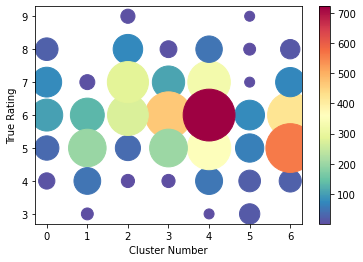

In [150]:
colorweightedScatter(expMax(ica(datatest),7),y)

Randomized Projections

In [158]:
def randomizedProj(data, comps):
  gauss_proj = GaussianRandomProjection(n_components=comps,random_state=0)
  gauss_proj.fit(data)
  vector_t = gauss_proj.transform(data)
  newData = pd.DataFrame(vector_t)
  return newData

[6 0 6 ... 2 2 2]


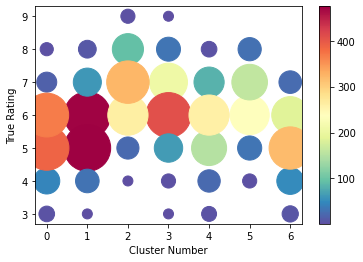

[4 4 4 ... 2 2 2]


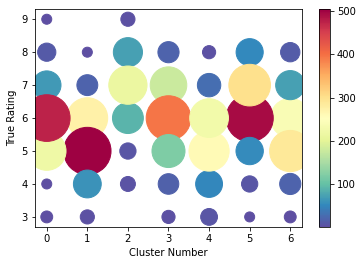

[1 1 1 ... 5 5 5]


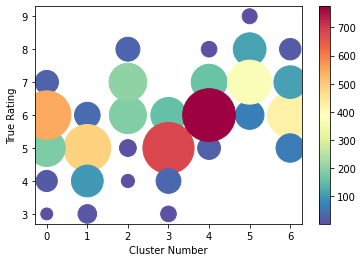

In [147]:
for i in range(5,8):
  colorweightedScatter(kmeans(randomizedProj(datatest,i),ret=True),y)

33


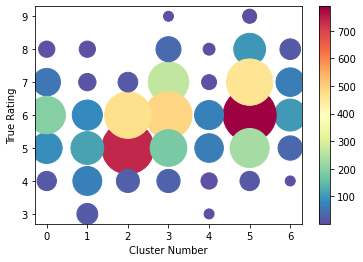

In [151]:
colorweightedScatter(expMax(randomizedProj(datatest,7),7),y)

Feature Agglomeration

**bold text**

In [ ]:
def featAgglom(data,answers,clus):
  agglo=FeatureAgglomeration(n_clusters=clus).fit_transform(data)
  if clus == 2:
    color = []
    for i in answers:
      if i==3:
          color.append('g')
      if  i==4:
          color.append('b')
      if i==5:
          color.append('r')
      if i==6:
          color.append('y')
      if i==7:
          color.append('Purple')
      if i==8:
          color.append('Orange')
      if i==9:
          color.append('Black')
    plt.scatter(agglo[:,0],agglo[:,1],c=color)
    plt.show()
  return agglo

[1 6 6 ... 4 4 4]


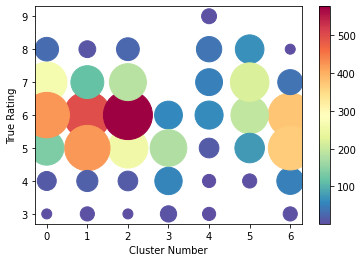

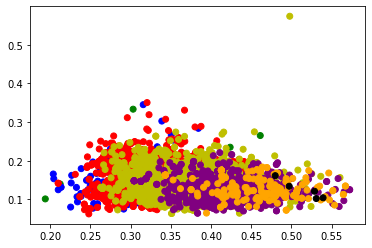

[3 0 5 ... 2 2 2]


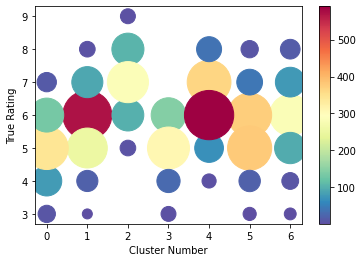

[6 3 6 ... 1 1 1]


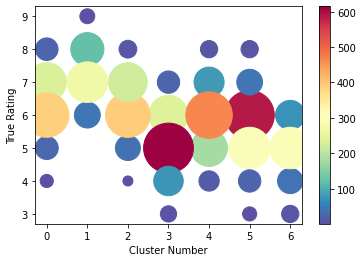

[2 4 0 ... 3 3 3]


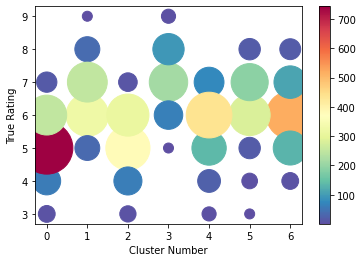

[1 1 6 ... 3 4 3]


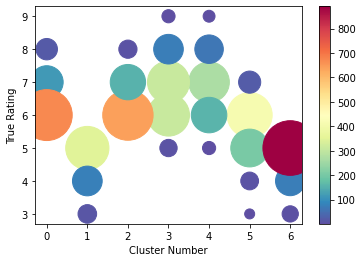

[5 5 3 ... 2 1 2]


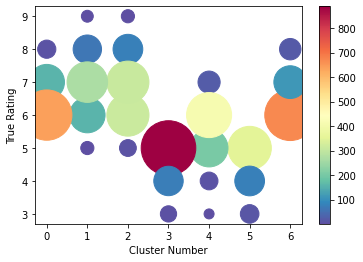

[3 6 3 ... 1 2 1]


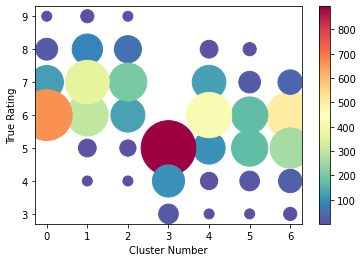

In [148]:
for i in range(1,8):
  colorweightedScatter(kmeans(featAgglom(datatest,y,i),ret=True),y)

28


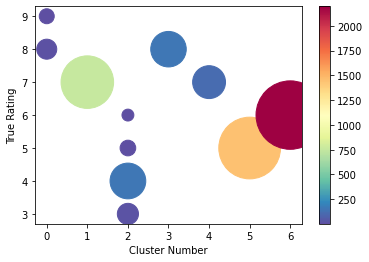

In [152]:
colorweightedScatter(expMax(featAgglom(datatest,y,i),7),y)

NN


In [182]:
def NNcreator(data,ytrue):
  
  x, X_test,y, y_test = train_test_split(data, ytrue, test_size=7/10, random_state=42)
 
  clf = MLPClassifier(solver='lbfgs', alpha=.001,hidden_layer_sizes=9, random_state=1,max_iter=5000)
  clf.fit(x, y)
  
  predicts = clf.predict(X_test)
  print(confusion_matrix(y_test,predicts))
  print(metrics.accuracy_score(y_test,predicts))

In [187]:
%time NNcreator(nndata,y)

%time NNcreator(featAgglom(nndata,y,5),y)
%time NNcreator(randomizedProj(nndata,7),y)
%time NNcreator(ica(nndata),y)
%time NNcreator(pc_a(nndata,7),y)

[[   0    0    5    6    0    0    0]
 [   0    6   74   33    1    0    0]
 [   0   17  503  517   12    0    0]
 [   0    3  257 1110  141    0    0]
 [   0    0   21  420  176    0    0]
 [   0    0    5   77   40    0    0]
 [   0    0    0    1    4    0    0]]
0.5234762321376495
CPU times: user 2.18 s, sys: 23.4 ms, total: 2.2 s
Wall time: 2.22 s
[[   0    0    4    7    0    0    0]
 [   0    1   52   60    1    0    0]
 [   0    3  497  537   12    0    0]
 [   0    0  257 1153  101    0    0]
 [   0    0   21  462  134    0    0]
 [   0    0    3   79   40    0    0]
 [   0    0    0    2    3    0    0]]
0.5205599300087489
CPU times: user 995 ms, sys: 96.3 ms, total: 1.09 s
Wall time: 997 ms
[[   0    1    5    4    1    0    0]
 [   0    4   53   51    6    0    0]
 [   0    8  536  478   25    2    0]
 [   0    6  293 1076  136    0    0]
 [   0    0   18  430  169    0    0]
 [   0    0    0   80   42    0    0]
 [   0    0    0    2    3    0    0]]
0.5205599300087489
CPU

In [198]:
df_nndata = data.iloc[:,:11]
df_nndata['newcol'] = kmeans(datatest,ret=True)
scaledNNdata = scaler.fit_transform(df_nndata.to_numpy())


[0 0 0 ... 5 5 5]


In [199]:
df_nndata2 = data.iloc[:,:11]
df_nndata2['newcol'] = expMax(datatest,comps=7)
scaledNNdata2 = scaler.fit_transform(df_nndata2.to_numpy())

28


In [201]:
df_3 = df_nndata
df_3['ne'] = df_nndata2['newcol']
scaledNNdata3 = scaler.fit_transform(df_3.to_numpy())

In [200]:
%time NNcreator(scaledNNdata,y)

%time NNcreator(scaledNNdata2,y)



[[   1    3    6    1    0    0    0]
 [   2   17   86    9    0    0    0]
 [   0   25  853  167    4    0    0]
 [   2    3   70 1289  147    0    0]
 [   1    0    8  363  245    0    0]
 [   0    0    3   42   77    0    0]
 [   0    0    0    2    3    0    0]]
0.7013706620005833
CPU times: user 3.86 s, sys: 13.9 ms, total: 3.87 s
Wall time: 3.88 s
[[   2    2    1    6    0    0    0]
 [   1   13   61   37    2    0    0]
 [   0   22  538  478   11    0    0]
 [   0    6  284 1058  163    0    0]
 [   0    0   16  361  240    0    0]
 [   0    0    0   71   51    0    0]
 [   0    0    0    1    4    0    0]]
0.5398075240594926
CPU times: user 2.39 s, sys: 101 ms, total: 2.5 s
Wall time: 2.4 s


In [202]:
%time NNcreator(scaledNNdata3,y)

[[   1    0    9    1    0    0    0]
 [   0   16   88    9    1    0    0]
 [   2   11  851  174   11    0    0]
 [   0    4   99 1252  156    0    0]
 [   0    0    9  348  260    0    0]
 [   0    0    1   48   73    0    0]
 [   0    0    0    1    4    0    0]]
0.6940799066783319
CPU times: user 2.09 s, sys: 14.9 ms, total: 2.11 s
Wall time: 2.11 s
